# Coursework 2: Neural Networks 

This coursework covers the topics covered in class regarding neural networks for image classification.

This coursework includes both coding questions as well as written ones. Please upload the notebook, which contains your code, results and answers as a pdf file onto Cate.

Dependencies: If you work on a college computer in the Computing Lab, where Ubuntu 18.04 is installed by default, you can use the following virtual environment for your work, where relevant Python packages are already installed.

`source /vol/bitbucket/wbai/virt/computer_vision_ubuntu18.04/bin/activate`

Alternatively, you can use pip, pip3 or anaconda etc to install Python packages.

**Note 1:** please read the both the text and code comment in this notebook to get an idea what you are supposed to implement.

**Note 2:** If you are using the virtual environment in the Computing Lab, please run the following command in the command line before opening jupyter-notebook and importing tensorflow. This will tell tensorflow where the Nvidia CUDA libariries are.

`export LD_LIBRARY_PATH=/vol/cuda/9.0.176/lib64/:"${LD_LIBRARY_PATH}}"` 

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline

Using TensorFlow backend.


## Question 1 (20 points)

Throughout this coursework you will be working with the Fashion-MNIST dataset. If you are interested, you may find relevant information regarding the dataset in this paper.

[1] Fashion-MNIST: A novel image dataset for benchmarking machine learning algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](https://arxiv.org/abs/1708.07747)

Be sure that you have the following files in your working directory: data.tar.gz and reader.py. Loading the data can be done as follows:

`from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()`

The dataset is already split into a set of 60,000 training images and a set of 10,000 test images. The images are of size 28x28 pixels and stored as 784-D vector. So if you would like to visualise the images, you need to reshape the array.

There are in total 10 label classes, which are:
* 0: T-shirt/top
* 1: Trousers
* 2: Pullover
* 3: Dress
* 4: Coat
* 5: Sandal
* 6: Shirt
* 7: Sneaker
* 8: Bag
* 9: Ankle boot

### 1.1 Load data (6 points)
Load the dataset and print the dimensions of the training set and the test set.

In [2]:
from reader import get_images
(x_train, y_train), (x_test, y_test) = get_images()

print("Training set dimension: ", x_train.shape)
print("Test set dimension: ", x_test.shape)

Training set dimension:  (60000, 784)
Test set dimension:  (10000, 784)


### 1.2 Visualize data (6 points)
Visualise 3 training images (T-shirt, trousers and pullover) and 3 test images (dress, coat and sandal).

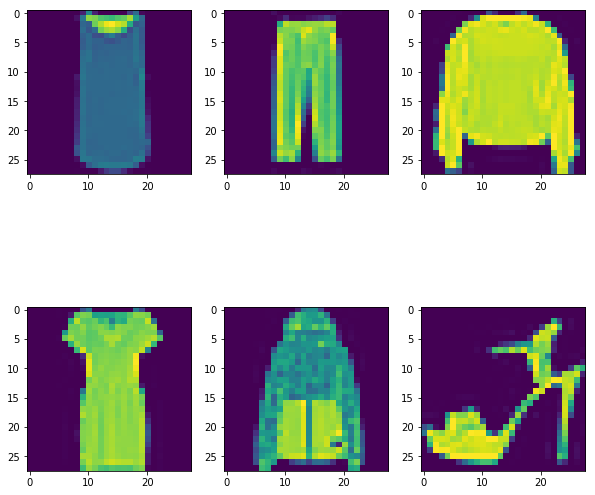

In [3]:
def one_class_separation (x_data, y_data, class_label) : 
    C = []
    for i in range(len(x_data)) : 
        if y_data[i] == class_label :
            C += [x_data[i].tolist()]
    return np.array(C)

# Training images
t_shirt_train = one_class_separation(x_train, y_train, 0)[1]
trousers_train = one_class_separation(x_train, y_train, 1)[1]
pullover_train = one_class_separation(x_train, y_train, 2)[1]

# Test images
dress_test = one_class_separation(x_train, y_train, 3)[1]
coat_test = one_class_separation(x_train, y_train, 4)[1]
sandal_test = one_class_separation(x_train, y_train, 5)[1]


# Plots
fig = plt.figure(figsize = (10, 10))

fig.add_subplot(2, 3, 1)
plt.imshow(np.reshape(t_shirt_train, (28, 28)))
fig.add_subplot(2, 3, 2)
plt.imshow(np.reshape(trousers_train, (28, 28)))
fig.add_subplot(2, 3, 3)
plt.imshow(np.reshape(pullover_train, (28, 28)))

fig.add_subplot(2, 3, 4)
plt.imshow(np.reshape(dress_test, (28, 28)))
fig.add_subplot(2, 3, 5)
plt.imshow(np.reshape(coat_test, (28, 28)))
fig.add_subplot(2, 3, 6)
plt.imshow(np.reshape(sandal_test, (28, 28)))
plt.show()

### 1.3 Data balance (4 points)
Print out the number of training samples for each class.

In [4]:
name_clothes = {0 : "T-shirt/top", 1 : "Trousers", 2 : "Pullover", 3 : "Dress", 4 : "Coat", 5 : "Sandal", 6 : "Shirt", 7 : "Sneaker", 8 : "Bag", 
                9 : "Ankle boot"}

for i in range (10) :
    print("Number of training samples for", name_clothes[i], ":", one_class_separation(x_train, y_train, i).shape)

Number of training samples for T-shirt/top : (6000, 784)
Number of training samples for Trousers : (6000, 784)
Number of training samples for Pullover : (6000, 784)
Number of training samples for Dress : (6000, 784)
Number of training samples for Coat : (6000, 784)
Number of training samples for Sandal : (6000, 784)
Number of training samples for Shirt : (6000, 784)
Number of training samples for Sneaker : (6000, 784)
Number of training samples for Bag : (6000, 784)
Number of training samples for Ankle boot : (6000, 784)


### 1.4 Discussion (4 points)
Is the dataset balanced? What would happen if the dataset is not balanced in the context of image classification? 

The training dataset is balanced with exactly 6,000 observations for each class. Indeed, if the dataset is not balanced for an image classification, some classes will be overrepresented and others will be under-represented in the training dataset, which may lead to an algorithm that has a bias and overpredicts the former and underpredicts the latter.

## Question 2 (40 points)

Build a neural network and train it with the Fashion-MNIST dataset. Here, we use the keras library, which is a high-level neural network library built upon tensorflow.

In [5]:
# Convert the label class into a one-hot representation
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### 2.1 Build a multi-layer perceptron, also known as multi-layer fully connected network. You need to define the layers, the loss function, the optimiser and evaluation metric. (30 points)

In [116]:
model = keras.models.Sequential()
model.add(Dense(392, input_dim = 784, activation = "relu"))
model.add(Dense(196, activation = "relu"))
model.add(Dense(98, activation = "relu"))
model.add(Dense(num_classes, activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_18 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_19 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                990       
Total params: 405,044
Trainable params: 405,044
Non-trainable params: 0
_________________________________________________________________
None


### 2.2 Define the optimisation parameters including the batch size and the number of epochs and then run the optimiser. (10 points)

We have tested that for an appropriate network architecture, on a personal laptop and with only CPU, it takes about a few seconds per epoch to train the network. For 100 epochs, it takes about a coffee break's time to finish the training. If you run it on a powerful GPU, it would be even much faster.

In [117]:
batch_size = 10000
epochs = 500
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/500
60000/60000 [==============================] - 2s 39us/step - loss: 12.9152 - acc: 0.1893
Epoch 2/500
60000/60000 [==============================] - 2s 31us/step - loss: 12.9924 - acc: 0.1934
Epoch 3/500
60000/60000 [==============================] - 3s 51us/step - loss: 12.5840 - acc: 0.2171
Epoch 4/500
60000/60000 [==============================] - 3s 51us/step - loss: 11.5454 - acc: 0.2792
Epoch 5/500
60000/60000 [==============================] - 2s 39us/step - loss: 10.1618 - acc: 0.3670
Epoch 6/500
60000/60000 [==============================] - 2s 41us/step - loss: 9.9159 - acc: 0.3833
Epoch 7/500
60000/60000 [==============================] - 3s 44us/step - loss: 9.8704 - acc: 0.3864
Epoch 8/500
60000/60000 [==============================] - 2s 38us/step - loss: 9.8492 - acc: 0.3878
Epoch 9/500
60000/60000 [==============================] - 2s 32us/step - loss: 9.8225 - acc: 0.3894
Epoch 10/500
60000/60000 [==============================] - 2s 33us/step - loss: 9.811

60000/60000 [==============================] - 2s 35us/step - loss: 11.0456 - acc: 0.3108
Epoch 82/500
60000/60000 [==============================] - 2s 32us/step - loss: 11.3215 - acc: 0.2971
Epoch 83/500
60000/60000 [==============================] - 2s 32us/step - loss: 11.3150 - acc: 0.2974
Epoch 84/500
60000/60000 [==============================] - 2s 34us/step - loss: 10.8093 - acc: 0.3276
Epoch 85/500
60000/60000 [==============================] - 2s 33us/step - loss: 9.8291 - acc: 0.3890
Epoch 86/500
60000/60000 [==============================] - 2s 32us/step - loss: 9.8138 - acc: 0.3899
Epoch 87/500
60000/60000 [==============================] - 2s 33us/step - loss: 9.6011 - acc: 0.4011
Epoch 88/500
60000/60000 [==============================] - 2s 33us/step - loss: 9.2597 - acc: 0.4209
Epoch 89/500
60000/60000 [==============================] - 2s 33us/step - loss: 9.3236 - acc: 0.4177
Epoch 90/500
60000/60000 [==============================] - 2s 35us/step - loss: 9.1351 - a

60000/60000 [==============================] - 2s 35us/step - loss: 0.3991 - acc: 0.8626
Epoch 161/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.3971 - acc: 0.8623
Epoch 162/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.3943 - acc: 0.8636
Epoch 163/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.3949 - acc: 0.8632
Epoch 164/500
60000/60000 [==============================] - 2s 35us/step - loss: 0.3887 - acc: 0.8651
Epoch 165/500
60000/60000 [==============================] - 2s 36us/step - loss: 0.3858 - acc: 0.8656
Epoch 166/500
60000/60000 [==============================] - 2s 36us/step - loss: 0.3887 - acc: 0.8638
Epoch 167/500
60000/60000 [==============================] - 3s 50us/step - loss: 0.3843 - acc: 0.8655
Epoch 168/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.3813 - acc: 0.8679
Epoch 169/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.375

60000/60000 [==============================] - 2s 33us/step - loss: 0.2935 - acc: 0.8964
Epoch 240/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.2910 - acc: 0.8970
Epoch 241/500
60000/60000 [==============================] - 2s 32us/step - loss: 0.2924 - acc: 0.8967
Epoch 242/500
60000/60000 [==============================] - 2s 31us/step - loss: 0.2987 - acc: 0.8937
Epoch 243/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.2951 - acc: 0.8954
Epoch 244/500
60000/60000 [==============================] - 2s 32us/step - loss: 0.2894 - acc: 0.8977
Epoch 245/500
60000/60000 [==============================] - 2s 32us/step - loss: 0.2914 - acc: 0.8968
Epoch 246/500
60000/60000 [==============================] - 2s 31us/step - loss: 0.2899 - acc: 0.8982
Epoch 247/500
60000/60000 [==============================] - 2s 32us/step - loss: 0.2910 - acc: 0.8974
Epoch 248/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.287

60000/60000 [==============================] - 2s 38us/step - loss: 0.2532 - acc: 0.9107
Epoch 319/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.2486 - acc: 0.9128
Epoch 320/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.2441 - acc: 0.9148
Epoch 321/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.2460 - acc: 0.9142
Epoch 322/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.2467 - acc: 0.9128
Epoch 323/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.2476 - acc: 0.9123
Epoch 324/500
60000/60000 [==============================] - 2s 38us/step - loss: 0.2491 - acc: 0.9115
Epoch 325/500
60000/60000 [==============================] - 2s 37us/step - loss: 0.2526 - acc: 0.9103
Epoch 326/500
60000/60000 [==============================] - 2s 40us/step - loss: 0.2480 - acc: 0.9127
Epoch 327/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.243

60000/60000 [==============================] - 2s 35us/step - loss: 0.2188 - acc: 0.9240
Epoch 398/500
60000/60000 [==============================] - 2s 36us/step - loss: 0.2163 - acc: 0.9254
Epoch 399/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.2122 - acc: 0.9269
Epoch 400/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.2121 - acc: 0.9265
Epoch 401/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.2132 - acc: 0.9268
Epoch 402/500
60000/60000 [==============================] - 2s 35us/step - loss: 0.2134 - acc: 0.9262
Epoch 403/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.2093 - acc: 0.9276
Epoch 404/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.2104 - acc: 0.9272
Epoch 405/500
60000/60000 [==============================] - 2s 35us/step - loss: 0.2160 - acc: 0.9252
Epoch 406/500
60000/60000 [==============================] - 2s 36us/step - loss: 0.210

60000/60000 [==============================] - 3s 44us/step - loss: 0.1880 - acc: 0.9357
Epoch 477/500
60000/60000 [==============================] - 2s 36us/step - loss: 0.1964 - acc: 0.9323
Epoch 478/500
60000/60000 [==============================] - 2s 39us/step - loss: 0.1954 - acc: 0.9330
Epoch 479/500
60000/60000 [==============================] - 2s 41us/step - loss: 0.1880 - acc: 0.9357
Epoch 480/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.1916 - acc: 0.9337
Epoch 481/500
60000/60000 [==============================] - 2s 35us/step - loss: 0.1910 - acc: 0.9344
Epoch 482/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.1895 - acc: 0.9351
Epoch 483/500
60000/60000 [==============================] - 2s 35us/step - loss: 0.1885 - acc: 0.9354
Epoch 484/500
60000/60000 [==============================] - 2s 34us/step - loss: 0.1899 - acc: 0.9346
Epoch 485/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.191

## Question 3 (20 points) 

Evaluate the performance of your network with the test data. 
Visualize the performance using appropriate metrics and graphs (eg. confusion matrix). 
Comment on your per class performance and how it could be better.

In [84]:
# This function is provided for you to display the confusion matrix.
# For more information about the confusion matrix, you can read at
# https://en.wikipedia.org/wiki/Confusion_matrix
def plot_confusion_matrix(cm, classes, normalize = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        
        cm: confusion matrix, default to be np.int32 data type
        classes: a list of the class labels or class names
        normalize: normalize the matrix so that each row amounts to one
        cmap: color map
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)

    plt.imshow(cm, interpolation = "nearest", cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()

### 3.1 Evaluate the classification accuracy on the test set (10 points)

In [118]:
score = model.evaluate(x_test, y_test, verbose = 1)
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1] * 100))
# Best: 85.81% Batch = 10000, Epoch = 500

10000/10000 [==============================] - 1s 61us/step

acc: 85.29%


### 3.2 Calculate and plot the confusion matrix (10 points)

Confusion matrix, without normalization
[[774   2  15  43   3   3 148   0  12   0]
 [  2 962   4  22   3   0   5   0   2   0]
 [ 21   1 707  17 120   1 131   0   2   0]
 [ 27  15  12 877  28   0  34   0   7   0]
 [  1   1  95  42 749   1 105   0   6   0]
 [  0   0   1   0   0 939   0  39   3  18]
 [111   7  67  24  67   1 700   0  23   0]
 [  1   0   0   0   0  29   0 925   3  42]
 [ 10   1   6   5   5   9  11   3 949   1]
 [  1   0   0   0   0  14   0  37   1 947]]


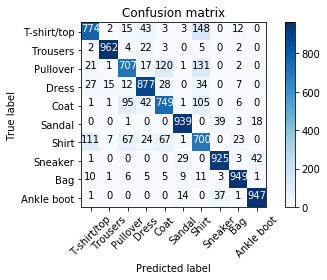

In [119]:
y_pred = model.predict(x_test, batch_size = batch_size)

y_test_cat = np.argmax(y_test, axis = 1)
y_pred_cat = np.argmax(y_pred, axis = 1)

import itertools
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_cat, y_pred_cat)

item_name_clothes = list(name_clothes.values())

plot_confusion_matrix(cm, classes = item_name_clothes, normalize = False, title = "Confusion matrix", cmap = plt.cm.Blues)

The per class performance is overall good with above 800 good classifications for almost every classes. It even reaches more than 900 for 5 classes: Trousers, Sandal, Sneaker, Bag and Ankle boot. The worst performances are for the Pullover and the Shirt with 700 good predictions, which is quite good after all. Thus, we can see that the algorithm performs well for distinct clothes classes like bags or trousers and quite bad for top clothes; indeed, it is more difficult to distinguish a shirt from a T-shirt than a bag. The algorithm could be better if there is a better focus on top clothes such as T-shirts, Pullovers, Dress, Coats and Shirts, so that we have a better result for those.

## Question 4 (20 points)
Take two photos, one of your clothes or shoes that belongs to one of 10 classes, the other that does not belong to any class.

Use either Python or other software (Photoshop, Gimp, or any image editer) to convert the photos into grayscale, crop the region of interest and reshape into the size of 28x28.

### 4.1 Load and visualise your own images (6 points)

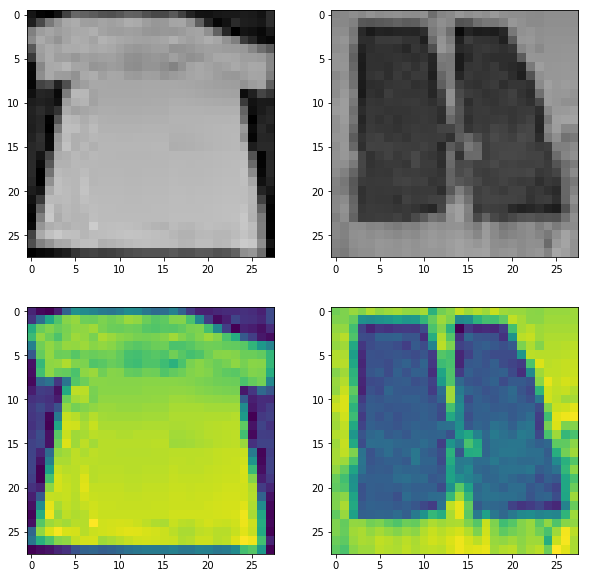

In [120]:
tshirt_raw = imageio.imread("TShirt-gray.jpg") # image.shape: (28 x 28 x 3)

socks_raw = imageio.imread("Socks-gray.jpg") # image.shape: (28 x 28 x 3)

def reshape_real_image(image) : 
    new_image = np.zeros((28, 28))
    for i in range (28) : 
        for j in range (28) :
            new_image[i][j] = image[i][j][0]
    return np.reshape(new_image, (1, 784))

tshirt = reshape_real_image(tshirt_raw)
socks = reshape_real_image(socks_raw)

#Plot
fig = plt.figure(figsize = (10, 10))

fig.add_subplot(2, 2, 1)
plt.imshow(tshirt_raw)
fig.add_subplot(2, 2, 2)
plt.imshow(socks_raw)

fig.add_subplot(2, 2, 3)
plt.imshow(np.reshape(tshirt, (28, 28)))
fig.add_subplot(2, 2, 4)
plt.imshow(np.reshape(socks, (28, 28)))

### 4.2 Test your network on the two images and show the classification results (10 points)

In [122]:
y_pred_tshirt = model.predict(tshirt, batch_size = batch_size)
y_pred_socks = model.predict(socks, batch_size = batch_size)

y_pred_cat_tshirt = np.argmax(y_pred_tshirt, axis = 1)[0]
y_pred_cat_socks = np.argmax(y_pred_socks, axis = 1)[0]

print("Prediced class for the T-shirt:", y_pred_cat_tshirt, "/", name_clothes[y_pred_cat_tshirt], ", with a probability of:", y_pred_tshirt[0][8])
print("Prediced class for the socks:", y_pred_cat_socks, "/", name_clothes[y_pred_cat_socks], ", with a probability of:", y_pred_socks[0][5])

Prediced class for the T-shirt: 8 / Bag , with a probability of: 0.77693224
Prediced class for the socks: 5 / Sandal , with a probability of: 0.99999607


### 4.3 Discuss the classification results and provide one method to improve real life performance of the network (4 points)

The algorithm predicted with a quite high confidence that the T-shirt was a bag, which is quite disappointing since bags have one of the highest correct prediction rates, and therefore few misclassifications whether false positive or false negative. We could have expected for the T-shirt that it either predicts well because the algorithm has quite good results for T-shirts, or that it fails and classifies as a shirt (148 T-shirts were wrongly predicted to be shirts in the test data). 

For the socks, the algorithm predicted that it was a Sandal. Because it is a pair of similar things, it is not surprising after all that socks, which are not in the database, are considered as sandals, even though it is not the case.

For a better performance in real life, we can perhaps ask for standardised test images, with a definite picture angle and ratio between the object and the background.

## 5. Survey
How long did the coursework take you to solve? 

The coursework took me a bit more than 5 hours.

Markdown $\alpha^2$